In [19]:
import pandas as pd

In [18]:
data1 = pd.read_stata("Data/pwt1001.dta")

# Add what inner join means

In [20]:
data1

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x_old,csh_m_old,csh_r_old,pl_c_old,pl_i_old,pl_g_old,pl_x_old,pl_m_old,pl_n_old,pl_k_old
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.425715,1.778124
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.419446,1.728804
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.418681,1.756007
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.426527,1.830088


In [22]:
import matplotlib.pyplot as plt

In [30]:
### Here I am making a very simple scatter plot to test to see if the variables are linearly dependant

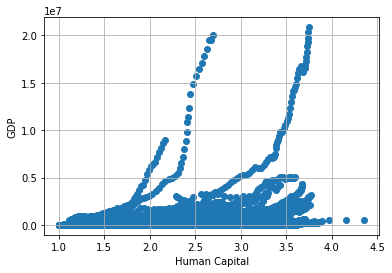

In [23]:
x = data1['hc']
y = data1['rgdpe']

plt.scatter(x, y)
plt.xlabel('Human Capital')
plt.ylabel('GDP')
plt.grid(True)
plt.show()


In [18]:
# Getting the correct variables (I am taking the log of both because I find it easier to interpret and 
# to make the relationship linear
data1['lnschool'] = np.log(data1['hc'])
data1['lngdp'] = np.log(data1['rgdpe'])

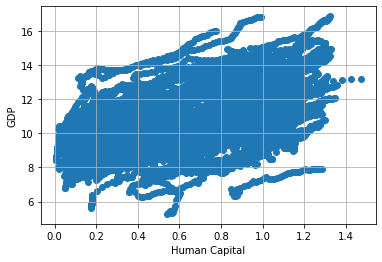

In [26]:
x = data1['lnschool']
y = data1['lngdp']

plt.scatter(x, y)
plt.xlabel('Human Capital')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

In [27]:
# Check for missing or infinite values in 'lnschool' variable (my regression did not run when I had missing values)
missing_values = data1['lnschool'].isnull().sum()
infinite_values = data1['lnschool'].isin([np.inf, -np.inf]).sum()

# Drop rows with missing or infinite values in 'lnschool'
data1.dropna(subset=['lnschool'], inplace=True)
data1 = data1[~data1['lnschool'].isin([np.inf, -np.inf])]

# Now fit the regression model
regression_model = sm.OLS(data1['lngdp'], sm.add_constant(data1[['lnschool']]))
results = regression_model.fit()


In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      2   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     3089.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:27:21   Log-Likelihood:                -16720.
No. Observations:                8637   AIC:                         3.344e+04
Df Residuals:                    8635   BIC:                         3.346e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9839      0.038    234.137      0.000       8.909       9.059
lnschool       2.7962      0.050     55.576      0.000       2.698       2.895
==============================================================================
Omnibus:                       14.387   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.891
Skew:                           0.078   Prob(JB):                     0.000963
Kurtosis:                       2.880   Cond. No.                         4.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# What do the results mean
A 1% increase in hc (representing school in my case) increases GDP by 2.7962% <br>
Info on how to intepret are found here: <br> https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

In [15]:
import statsmodels.api as sm

regression_model_2 = sm.RLM(data1['lngdp'], sm.add_constant(data1[['lnschool']]), M=sm.robust.norms.TukeyBiweight())
results_2 = regression_model_2.fit()

In [16]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  lngdp   No. Observations:                 8637
Model:                            RLM   Df Residuals:                     8635
Method:                          IRLS   Df Model:                            1
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 29 Feb 2024                                         
Time:                        16:00:23                                         
No. Iterations:                    15                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9507      0.039    226.607      0.000       8.873       9.028
lnschool       2.8266      0.052     54.576      0.000       2.725       2.928
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

# What is the difference? 

The main difference between ordinary least squares (OLS) regression and L1 regression lies in the way they handle the optimization of the regression. So lets take a look at how these two are optimized!!!

### Optimization Objective:


##### For OLS
OLS is very simple. The regression minimizes the sum of squared residuals between the observed and predicted values. We use the square to make sure the value is positive and the trend line is then made that minimizes the differences in the squares of the point the model would predict and the actual point.

##### For L1 regression
Very similar to OLS but instead of minimizing the least squares it minimizes the sum of the absolute values of the residuals. This way the values are all still positive and you can calculate the difference between what the model would predict and the actual model.


### Why does this make a difference?
From what I can read one big difference is the sensitivity to outliers. This makes perfect sense since one is minimizing the squared differences and the other the absolute value difference. The OLS model that minimizes squared difference will be much more sensitive to outliers.


##### Issue with L1:

L1 regression typically requires iterative optimization algorithms like coordinate descent or gradient descent, which can be computationally more demanding, especially for large datasets.


The squared error objective function in OLS regression is smooth and continuous, with derivatives that are continuous everywhere. This smoothness property facilitates the use of numerical optimization techniques, such as gradient descent, which rely on the smoothness of the objective function to navigate the parameter space efficiently.

### Which one I prefer

Personally I like the OLS model much better. In terms of interpreting the result both are relatively easy to understand but based off what I said above there are some clear advantages in using OLS and the difference in coefficients in our examples were very close. This may change for different regression but in the example used all the metrics were relatively the same.

### What I want to add to this artifact
- Can I make a panel regression looking into GDP growth of countries and follow what we know of the SOLOW model (add hc, savings, population growth into the regression)